<a href="https://colab.research.google.com/github/almirarana31/datasciencefinal/blob/main/twitter_scraper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!python -m pip install --upgrade certifi

In [ ]:
# Set up
import pandas as pd
import os

# Twitter Auth Token
# Store the token as an environment variable for better security
os.environ['TWITTER_AUTH_TOKEN'] = 'cfa86427b73fa41b4fcc5d06218a94da8d5a8150'  # change this auth token

# Install Node.js and required Python package
!pip install pandas

# Install Node.js (because tweet-harvest is built using Node.js)
!sudo apt-get update
!sudo apt-get install -y ca-certificates curl gnupg
!sudo mkdir -p /etc/apt/keyrings
!curl -fsSL https://deb.nodesource.com/gpgkey/nodesource-repo.gpg.key | sudo gpg --dearmor -o /etc/apt/keyrings/nodesource.gpg

!NODE_MAJOR=20 && echo "deb [signed-by=/etc/apt/keyrings/nodesource.gpg] https://deb.nodesource.com/node_$NODE_MAJOR.x nodistro main" | sudo tee /etc/apt/sources.list.d/nodesource.list

!sudo apt-get update
!sudo apt-get install nodejs -y

# Verify Node.js Installation
!node -v

# Set up Crawling Parameters
filename = 'tweet.csv'
search_keyword = 'mental health since:2020-01-01 until:2020-01-31 lang:en'
limit = 1000  # Increased the limit for better analysis

twitter_auth_token = os.getenv('TWITTER_AUTH_TOKEN')  # Retrieve auth token

# Use tweet-harvest to Crawl Data
!npx -y tweet-harvest@2.6.1 -o "{filename}" -s "{search_keyword}" --tab "LATEST" -l {limit} --token {twitter_auth_token}

# Load the Data into a Pandas DataFrame
file_path = filename  # Updated path, assuming it's saved in the current directory

try:
    df = pd.read_csv(file_path, delimiter=",")
    # Display the first few rows of the DataFrame to verify the data
    print("Data loaded successfully.")
    print(df.head())

    # Process Data for Engagement Rate and Verification (if possible)
    if 'likes' in df.columns and 'retweets' in df.columns and 'followers_count' in df.columns:
        # Add Engagement Rate Column
        df['engagement_rate'] = ((df['likes'] + df['retweets'] + df.get('replies', 0)) / df['followers_count']) * 100

        # Display engagement rate stats
        print("\nEngagement rate calculated successfully.")
        print(df[['username', 'engagement_rate']].describe())
    else:
        print("\nWarning: Necessary columns for engagement calculation are missing. Please verify the data structure.")

    # Save the Processed Data
    processed_filename = 'tweets_2020.csv'
    df.to_csv(processed_filename, index=False)
    print(f"Processed data saved to {processed_filename}")

except FileNotFoundError:
    print(f"Error: File {file_path} not found. Please verify the output path.")


Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 https://deb.nodesource.com/node_20.x nodistro InRelease
Hit:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:5 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading

In [ ]:
import time
start_time = time.time()

In [ ]:
# from here we just use the data we already collected so we dont have to keep scraping twitter over and over
df = pd.read_csv('tweet_2020.csv')
df

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1223033130254315521,Thu Jan 30 23:59:55 +0000 2020,0,How Religion Can Impact Mental Health in Good ...,1223033130254315521,NaN,NaN,en,Dallas suburbs,0,0,0,https://x.com/sparky7u/status/1223033130254315521,4294203440,sparky7u
1,1222907250383245320,Thu Jan 30 23:59:44 +0000 2020,0,@eugenegu @realDonaldTrump @foxandfriends Real...,1223033082317398016,NaN,eugenegu,en,Malaysia,0,0,0,https://x.com/ceobriefings/status/122303308231...,777708049519693824,ceobriefings
2,1223033063657164808,Thu Jan 30 23:59:39 +0000 2020,5,I ve wanted to tell this story about mental he...,1223033063657164808,NaN,NaN,en,NaN,1,3,0,https://x.com/AraHossain93/status/122303306365...,492753435,AraHossain93
3,1222581039199084545,Thu Jan 30 23:59:37 +0000 2020,0,@AndreaHorwath #alcoholawareness Let's talk an...,1223033053779378176,NaN,AndreaHorwath,en,Greater Vancouver,0,0,0,https://x.com/fscarfe/status/1223033053779378176,405259565,fscarfe
4,1223028707935342593,Thu Jan 30 23:59:34 +0000 2020,0,@SenThomTillis That s wonderful as I am a prop...,1223033042639507465,NaN,SenThomTillis,en,"North Carolina, USA",0,0,0,https://x.com/rshavas/status/1223033042639507465,235633331,rshavas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889,1222686272143142914,Thu Jan 30 21:23:16 +0000 2020,1,@jazz_inmypants This is such a beautiful threa...,1222993705419911179,NaN,NaN,en,"Toronto, Ontario",0,0,0,https://x.com/thefatprincessz/status/122299370...,34268703,thefatprincessz
890,1222993680744820747,Thu Jan 30 21:23:10 +0000 2020,2,Entire nursing program: safety is always ur nu...,1222993680744820747,NaN,NaN,en,"Iowa City, IA",0,0,0,https://x.com/Sammmwichhh/status/1222993680744...,1290268886,Sammmwichhh
891,1222993678341373953,Thu Jan 30 21:23:09 +0000 2020,13,2nd can in 2 days with this lovley beer. Celeb...,1222993678341373953,https://pbs.twimg.com/media/EPjyQ7fXUAEtDnk.jpg,NaN,en,Enjoying life,0,3,1,https://x.com/Mister_SWP/status/12229936783413...,751789298,Mister_SWP
892,1222993638722064385,Thu Jan 30 21:23:00 +0000 2020,0,We want to support the mental health and wellb...,1222993638722064385,https://pbs.twimg.com/media/EPjTw2dXsAIDerI.jpg,NaN,en,"Grand Rapids, MI",0,0,0,https://x.com/thec2group/status/12229936387220...,35783396,thec2group


In [ ]:
!pip install nltk textblob

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
start_time = time.time()
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()


def analyze_sentiment(text):
    sentiment_score = sia.polarity_scores(text)
    if sentiment_score['compound'] >= 0.05:
        return 'Positive'
    elif sentiment_score['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['full_text'].apply(analyze_sentiment)

print(df)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


     conversation_id_str                      created_at  favorite_count  \
0    1223033130254315521  Thu Jan 30 23:59:55 +0000 2020               0   
1    1222907250383245320  Thu Jan 30 23:59:44 +0000 2020               0   
2    1223033063657164808  Thu Jan 30 23:59:39 +0000 2020               5   
3    1222581039199084545  Thu Jan 30 23:59:37 +0000 2020               0   
4    1223028707935342593  Thu Jan 30 23:59:34 +0000 2020               0   
..                   ...                             ...             ...   
889  1222686272143142914  Thu Jan 30 21:23:16 +0000 2020               1   
890  1222993680744820747  Thu Jan 30 21:23:10 +0000 2020               2   
891  1222993678341373953  Thu Jan 30 21:23:09 +0000 2020              13   
892  1222993638722064385  Thu Jan 30 21:23:00 +0000 2020               0   
893  1222915902083080193  Thu Jan 30 21:22:40 +0000 2020               2   

                                             full_text               id_str  \
0    How

<ipython-input-45-fac42897a583>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='viridis')


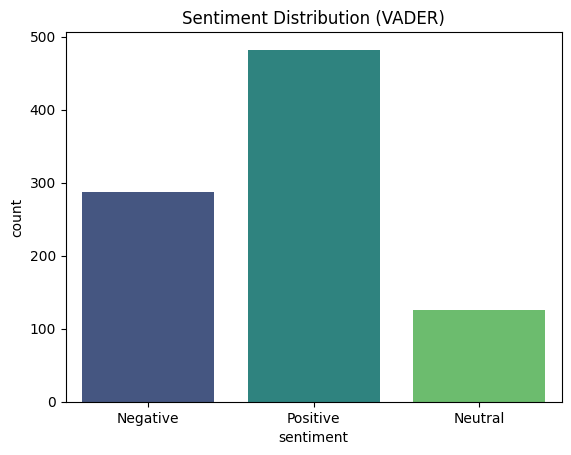

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.countplot(data=df, x='sentiment', palette='viridis')
plt.title("Sentiment Distribution (VADER)")
plt.show()

In [ ]:
df['total_engagements'] = df['favorite_count'] + df['retweet_count'] + df['reply_count'] + df['quote_count']
df['engagement_rate'] = (df['total_engagements'] / (df['favorite_count'] + df['retweet_count'])) * 100
df

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,sentiment,total_engagements,engagement_rate
0,1223033130254315521,Thu Jan 30 23:59:55 +0000 2020,0,How Religion Can Impact Mental Health in Good ...,1223033130254315521,NaN,NaN,en,Dallas suburbs,0,0,0,https://x.com/sparky7u/status/1223033130254315521,4294203440,sparky7u,Negative,0,NaN
1,1222907250383245320,Thu Jan 30 23:59:44 +0000 2020,0,@eugenegu @realDonaldTrump @foxandfriends Real...,1223033082317398016,NaN,eugenegu,en,Malaysia,0,0,0,https://x.com/ceobriefings/status/122303308231...,777708049519693824,ceobriefings,Negative,0,NaN
2,1223033063657164808,Thu Jan 30 23:59:39 +0000 2020,5,I ve wanted to tell this story about mental he...,1223033063657164808,NaN,NaN,en,NaN,1,3,0,https://x.com/AraHossain93/status/122303306365...,492753435,AraHossain93,Positive,9,180.000000
3,1222581039199084545,Thu Jan 30 23:59:37 +0000 2020,0,@AndreaHorwath #alcoholawareness Let's talk an...,1223033053779378176,NaN,AndreaHorwath,en,Greater Vancouver,0,0,0,https://x.com/fscarfe/status/1223033053779378176,405259565,fscarfe,Neutral,0,NaN
4,1223028707935342593,Thu Jan 30 23:59:34 +0000 2020,0,@SenThomTillis That s wonderful as I am a prop...,1223033042639507465,NaN,SenThomTillis,en,"North Carolina, USA",0,0,0,https://x.com/rshavas/status/1223033042639507465,235633331,rshavas,Positive,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889,1222686272143142914,Thu Jan 30 21:23:16 +0000 2020,1,@jazz_inmypants This is such a beautiful threa...,1222993705419911179,NaN,NaN,en,"Toronto, Ontario",0,0,0,https://x.com/thefatprincessz/status/122299370...,34268703,thefatprincessz,Negative,1,100.000000
890,1222993680744820747,Thu Jan 30 21:23:10 +0000 2020,2,Entire nursing program: safety is always ur nu...,1222993680744820747,NaN,NaN,en,"Iowa City, IA",0,0,0,https://x.com/Sammmwichhh/status/1222993680744...,1290268886,Sammmwichhh,Positive,2,100.000000
891,1222993678341373953,Thu Jan 30 21:23:09 +0000 2020,13,2nd can in 2 days with this lovley beer. Celeb...,1222993678341373953,https://pbs.twimg.com/media/EPjyQ7fXUAEtDnk.jpg,NaN,en,Enjoying life,0,3,1,https://x.com/Mister_SWP/status/12229936783413...,751789298,Mister_SWP,Positive,17,121.428571
892,1222993638722064385,Thu Jan 30 21:23:00 +0000 2020,0,We want to support the mental health and wellb...,1222993638722064385,https://pbs.twimg.com/media/EPjTw2dXsAIDerI.jpg,NaN,en,"Grand Rapids, MI",0,0,0,https://x.com/thec2group/status/12229936387220...,35783396,thec2group,Negative,0,NaN


In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt

df = pd.read_csv("tweet_2020.csv")

data = df['full_text'].dropna()

nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.lower()

    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return ' '.join(tokens)

data_cleaned = data.apply(preprocess_text)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(data_cleaned)

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)

topics = lda.components_
words = vectorizer.get_feature_names_out()

def display_topics(model, feature_names, num_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-num_top_words - 1:-1]]))

display_topics(lda, words, num_top_words=10)

Topic 1:
health mental feel time make better day person help need
Topic 2:
health mental people issue support day important wellness im thing
Topic 3:
health mental amp care watch time child recently life good
Topic 4:
health mental need help service people amp family child community
Topic 5:
health mental like day talk need issue let time better


In [ ]:
end_time = time.time()
total_time = end_time - start_time

In [ ]:
throughput = len(df) / total_time
print(f"Throughput: {throughput:.2f} rows per second")

Throughput: 28.42 rows per second


In [ ]:
df_2024 = pd.read_csv('tweets 2024.csv')
df_2023 = pd.read_csv('tweets 2023.csv')
df_2022 = pd.read_csv('tweets 2022.csv')
df_2021 = pd.read_csv('tweets 2021.csv')
df_2020 = pd.read_csv('tweets 2020.csv')

In [ ]:
# Assuming you have separate DataFrames for each year's data, e.g., df_2023, df_2024
# Combine all data into one DataFrame
df_combined = pd.concat([df_2024, df_2023, df_2022, df_2021, df_2020], ignore_index=True)

# Clean the combined DataFrame
# Remove duplicates
df_combined = df_combined.drop_duplicates(subset=["tweet_url"])

# Further cleaning and validation
df_combined.dropna(subset=["full_text", "created_at"], inplace=True)

In [ ]:
df_combined

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1774586599688605879,Sun Mar 31 23:56:30 +0000 2024,0,@indicthim you should get off social media and...,1774586599688605879,NaN,NaN,en,NaN,0,0,0,https://x.com/declared1776/status/177458659968...,267014622,declared1776
1,1774586580100952423,Sun Mar 31 23:56:25 +0000 2024,2,Describe Your Mental Health with your third Em...,1774586580100952423,NaN,NaN,en,"Sialkot, Pakistan",0,2,1,https://x.com/aamir_280/status/177458658010095...,1512387847692894209,aamir_280
2,1774586564959424732,Sun Mar 31 23:56:21 +0000 2024,3,Current Mental health status.... Coneheads. mo...,1774586564959424732,NaN,NaN,en,You're not allowed until...,0,0,0,https://x.com/Crashonomics/status/177458656495...,1077419833266966529,Crashonomics
3,1774359400020398081,Sun Mar 31 23:56:12 +0000 2024,13,@Gelvetication @Tamias1000 @happinasu @LumLotu...,1774586526820704592,NaN,Gelvetication,en,NaN,0,1,0,https://x.com/Hikiru_/status/1774586526820704592,1765190338921082880,Hikiru_
4,1774497205316915587,Sun Mar 31 23:56:03 +0000 2024,5,@ask_aubry It sounds like he was asked to do s...,1774586487092166784,NaN,ask_aubry,en,"Toronto, Ontario",0,0,0,https://x.com/flamesprite/status/1774586487092...,18130932,flamesprite
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3282,1222686272143142914,Thu Jan 30 21:23:16 +0000 2020,1,@jazz_inmypants This is such a beautiful threa...,1222993705419911179,NaN,NaN,en,"Toronto, Ontario",0,0,0,https://x.com/thefatprincessz/status/122299370...,34268703,thefatprincessz
3283,1222993680744820747,Thu Jan 30 21:23:10 +0000 2020,2,Entire nursing program: safety is always ur nu...,1222993680744820747,NaN,NaN,en,"Iowa City, IA",0,0,0,https://x.com/Sammmwichhh/status/1222993680744...,1290268886,Sammmwichhh
3284,1222993678341373953,Thu Jan 30 21:23:09 +0000 2020,13,2nd can in 2 days with this lovley beer. Celeb...,1222993678341373953,https://pbs.twimg.com/media/EPjyQ7fXUAEtDnk.jpg,NaN,en,Enjoying life,0,3,1,https://x.com/Mister_SWP/status/12229936783413...,751789298,Mister_SWP
3285,1222993638722064385,Thu Jan 30 21:23:00 +0000 2020,0,We want to support the mental health and wellb...,1222993638722064385,https://pbs.twimg.com/media/EPjTw2dXsAIDerI.jpg,NaN,en,"Grand Rapids, MI",0,0,0,https://x.com/thec2group/status/12229936387220...,35783396,thec2group


In [ ]:
df_combined.to_csv('combined_tweets.csv', index=False)